https://stackoverflow.com/questions/77684365/scipy-optimze-curve-fit-gives-a-high-standard-error-even-though-fit-seems-good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
def model(x, a, b):
    return a * x + b

In [9]:
np.random.seed(12345)
x = np.linspace(-400, 400, 50)
y = model(x, 1e-7, 2e-4)
s = 1e-6 * np.ones_like(y)
n = s * np.random.normal(size=y.size)
yn = y + n

In [15]:
popt, pcov = optimize.curve_fit(model, x, yn, sigma=s, absolute_sigma=True)
popt

array([9.85820752e-08, 1.99948048e-04])

In [16]:
np.sqrt(np.diag(pcov))

array([6.00245055e-10, 1.41421356e-07])

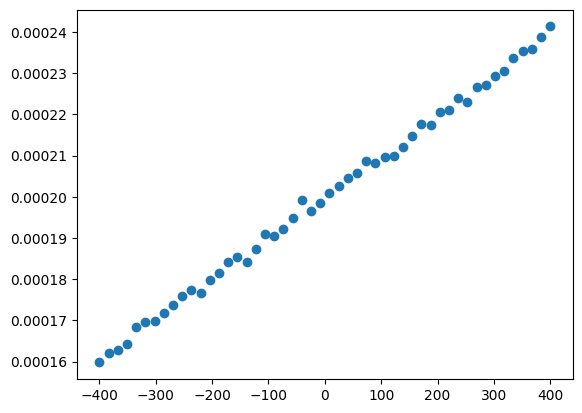

In [11]:
fig, axe = plt.subplots()
axe.scatter(x, yn)

In [26]:
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.mixture import GaussianMixture

In [6]:
data = pd.read_csv("Hysteresis.txt", sep="\t", header=None, names=["x", "y", "z"])

In [7]:
data["u"] = data["z"] / (2. * data["y"])

In [50]:
cluster = HDBSCAN(min_cluster_size=200, min_samples=30)

In [51]:
cluster.fit(data[["x", "u"]])

HDBSCAN(min_cluster_size=200, min_samples=30)

In [52]:
#labels = cluster.predict(data[["x", "u"]])

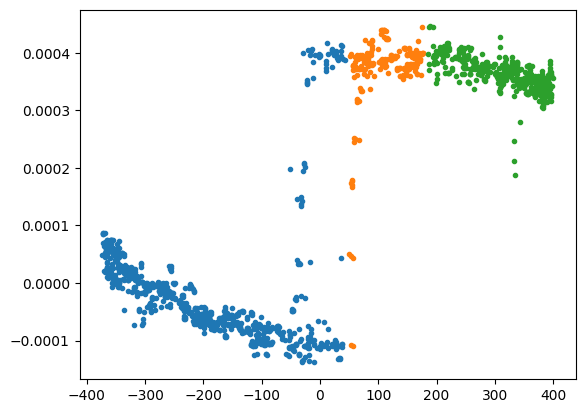

In [53]:
fig, axe = plt.subplots()
for i in range(28):
    q = cluster.labels_ == i
    axe.scatter(data.loc[q, "x"], data.loc[q, "u"], marker=".")